## Demonstration with Breast Cancer Wisconsin Data

### Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None)

In [3]:
# Get the data and its  label from the dataframe
x = df.loc[:, 0:2].values
_y = df.loc[:, 3].values
# Peek the data
x.shape, _y.shape, x[:1], _y[:30]

((306, 3),
 (306,),
 array([[30, 64,  1]]),
 array([1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 2, 1, 1, 1, 1, 1]))

In [4]:
# Transform the training label
# 1 (the patient survived 5 years or longer)= 1, 2 (the patient died within 5 year) = 0
y = np.zeros(_y.shape[0], dtype=int)
y[_y==1] = 1
y[:30]

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1])

In [5]:
# Divide the data
# Training 70%, Test 30%
n = int(0.7 * x.shape[0])
x_train, y_train = x[:n], y[:n]
x_test, y_test = x[n:], y[n:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((214, 3), (214,), (92, 3), (92,))

### Logistic Regression at Play

In [6]:
from log_regression import LogisticRegression

In [7]:
# Training with alpha = 0.001
classifier = LogisticRegression(alpha=0.001)
classifier.fit(x_train, y_train, 10000)
acc, conf = classifier.evaluate(x_train, y_train, verbose=True)

Accuracy: 0.747663551402
Confusion matrix: 
 [[   8.   48.]
 [   6.  152.]]


In [8]:
# See the score for test data
acc, conf = classifier.evaluate(x_test, y_test, verbose=True)

Accuracy: 0.760869565217
Confusion matrix: 
 [[  7.  18.]
 [  4.  63.]]


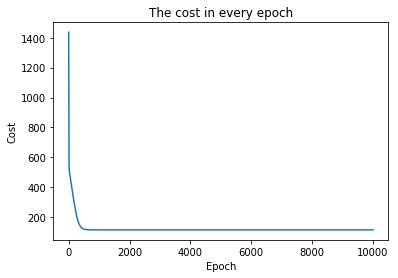

In [9]:
# See the cost log graph
import matplotlib.pyplot as plt 

x = np.arange(len(classifier.cost_log)) + 1
plt.plot(x, classifier.cost_log)
plt.title('The cost in every epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()